In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,recall_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\reviews_data_dump\reviews_badminton\data.csv")

In [6]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [8]:
df.duplicated().sum()

4

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 0 to 8515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8514 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.6+ KB


In [12]:
# Drop rows with missing values
df.dropna(subset=['Review text', 'Ratings'], inplace=True)

In [13]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5


In [14]:
# Convert ratings to binary sentiment labels
df['Sentiment'] = np.where(df['Ratings'] > 3, 'Positive', 'Negative')

In [15]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Negative
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
...,...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3,Negative
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4,Positive
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5,Positive
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5,Positive


In [16]:
df.isna().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
Sentiment            0
dtype: int64

In [17]:
def remove_repetitive_emojis(x):
    emoji_pattern = re.compile(r"(\s*)([\U0001F600-\U0001F64F"
                               r"\U0001F300-\U0001F5FF"
                               r"\U0001F680-\U0001F6FF"
                               r"\U0001F1E0-\U0001F1FF"
                               r"\U00002500-\U00002BEF"
                               r"\U00002702-\U000027B0"
                               r"\U000024C2-\U0001F251"
                               r"\U0001f926-\U0001f937"
                               r"\U00010000-\U0010ffff"
                               r"\u2640-\u2642"
                               r"\u2600-\u2B55"
                               r"\u200d"
                               r"\u23cf"
                               r"\u23e9"
                               r"\u231a"
                               r"\ufe0f"
                               r"\u3030"
                               r"]{1,})", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'\1', x)
    return cleaned_text

In [18]:
# Function to preprocess text
def remove_punctuation_and_numbers(x):
    pattern = r'[^\w\s]|[\d]'
    cleaned_text = re.sub(pattern,'', x)
    return cleaned_text

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    #Stemming words
    stem=PorterStemmer()
    stem_token=[stem.stem(word) for word in filtered_tokens]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

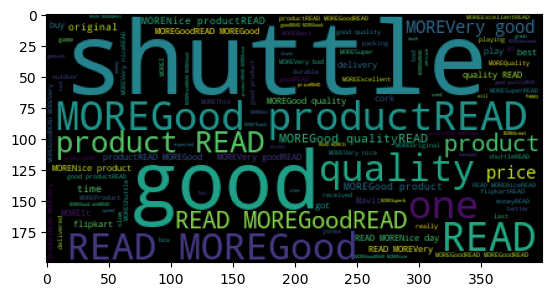

In [19]:
from wordcloud import WordCloud
vector = CountVectorizer()
vector.fit_transform(df['Review text']).toarray()
text = "".join(df['Review text'].values.tolist())
data=WordCloud().generate(text)
plt.imshow(data)

In [20]:
# Apply preprocessing to the 'Review Text' column
df['Review text'] = df['Review text'].apply(preprocess_text)

In [21]:
analyzer = SentimentIntensityAnalyzer()

In [22]:
def polarity(n):
    return analyzer.polarity_scores(n)['compound']

In [23]:
df['Emotion'] = df['Review text'].apply(polarity)

In [24]:
def sentiment(n):
    if n > 0:
        return 'Positive'
    elif n < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [25]:
df['Emotion'] = df['Emotion'].apply(sentiment)

<Axes: >

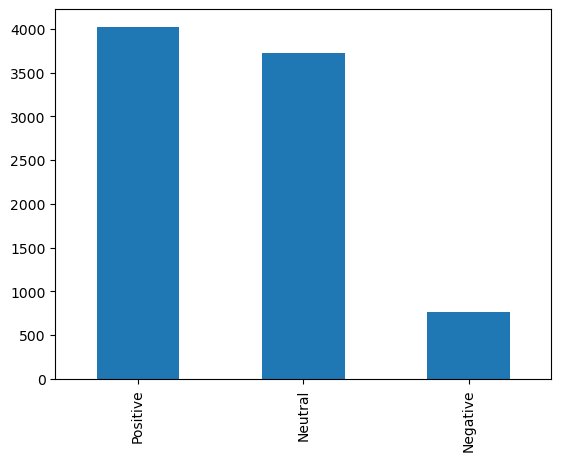

In [26]:
df['Emotion'].value_counts().plot(kind = 'bar')

In [27]:
df = pd.concat([df['Review text'],df['Emotion']],axis=1)

In [28]:
df['Emotion'].value_counts()

Positive    4025
Neutral     3722
Negative     763
Name: Emotion, dtype: int64

## Splitting the Data

In [29]:
X=df['Review text']
y=df['Emotion']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

In [31]:
X_test

7886                                             goodread
1587                   original awesome love flipkartread
5413                                           superbread
2482    amazing genuine product best pricego ahead wit...
8074                                              nycread
                              ...                        
8236                                     quality goodread
4179                                     good productread
334                                              goodread
4351                                     nice productread
987                     one best shuttle outdoor playread
Name: Review text, Length: 1702, dtype: object

In [32]:
pipe=Pipeline([('Vectorization',CountVectorizer(stop_words='english')),
              ("Estimator",MultinomialNB(alpha=3))])

In [33]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=3))])

In [34]:
y_pred = pipe.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.8730904817861339

In [36]:
pd.crosstab(y_test,y_pred)

col_0,Negative,Neutral,Positive
Emotion,,,
Negative,76,2,58
Neutral,2,587,136
Positive,8,10,823


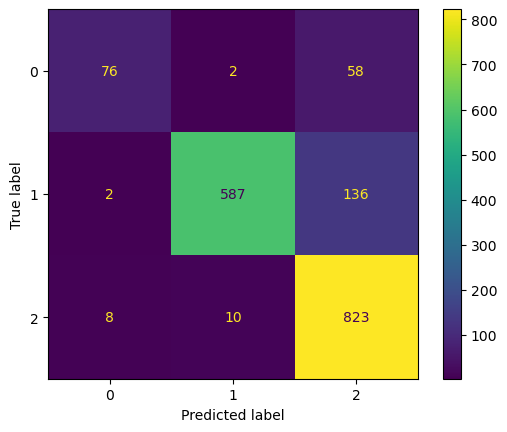

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.88      0.56      0.68       136
     Neutral       0.98      0.81      0.89       725
    Positive       0.81      0.98      0.89       841

    accuracy                           0.87      1702
   macro avg       0.89      0.78      0.82      1702
weighted avg       0.89      0.87      0.87      1702



In [50]:
import pickle
with open ('sentiment.pkl','wb') as f:
    pickle.dump(pipe,f)

In [51]:
predict = pickle.load(open('sentiment.pkl','rb'))

In [52]:
predict.predict(['this product is good'])[0]

'Positive'

In [62]:
predict.predict(['its a average product'])[0]


'Neutral'

In [58]:
pridict.predict(['this is a average product'])[0]

NameError: name 'pridict' is not defined

In [59]:
import joblib
print(joblib.__version__)

1.2.0


In [45]:
import os
os.getcwd()

'C:\\Users\\Admin\\Downloads'

In [46]:
i

NameError: name 'i' is not defined